### Analisis de Datos -  Tarea 2: 
### Integrantes

- Javiera Santana Abasolo
- Cristhian Alejandro Solís
- Cristian Alejandro Vásquez Poblete
- César Godoy Delaigue

***Pofresor: Boris Panes - Analisis de Datos - Magister DataSicence UDD***

El acceso al agua potable segura es esencial para la salud, un derecho humano fundamental y un componente de una política eficaz para la protección de la salud. Esto es importante como un problema de salud y desarrollo a nivel nacional, regional y local. En algunas regiones, se ha demostrado que las inversiones en abastecimiento de agua y saneamiento pueden generar un beneficio económico neto, ya que las reducciones en los efectos adversos para la salud y los costos de atención médica superan los costos de realizar las intervenciones.

Sobre este DataSet

- ppm: partes por millón
- μg/L: microgramo por litro
- mg/L: miligramo por litro

Column description:

1. ph: pH del agua (de 0 a 14).
2. Hardness (Dureza): Capacidad del agua para precipitar en mg/L.
3. Solids (Sólidos): Sólidos totales disueltos en ppm.
4. Chloramines (Cloraminas): Cantidad de Cloraminas en ppm.
5. Sulfate (Sulfatos): Cantidad de Sulfatos disueltos en mg/L.
6. Conductivity (Conductividad): Conductividad eléctrica del agua en μS/cm.
7. Organic_carbon (Carbono_orgánico): Cantidad de carbono orgánico en ppm.
8. Trihalomethanes (Trihalometanos): Cantidad de trihalometanos en μg/L.
9. Turbidity (Turbidez): Medida de la propiedad de emisión de luz del agua en NTU.
10. Potability (Potabilidad): Indica si el agua es segura para el consumo humano. Potable = 1 y No potable = 0

### Planteamiento del problema:

Predecir el nivel de pH del agua basado en otras características del agua como la temperatura, la concentración de oxígeno disuelto, y la turbidez.

### Detalle de las columnas del conjunto de datos

- **Valor del pH**: El pH es un parámetro importante en la evaluación del equilibrio ácido-base del agua y es indicador del estado ácido o alcalino. La OMS ha recomendado un límite máximo permisible de pH entre 6,5 y 8,5. Los rangos del presente estudio fueron de 6,52 a 6,83, dentro del estándar de la OMS.

- **Dureza**: Causada principalmente por sales de calcio y magnesio, las cuales se disuelven en el agua al pasar por depósitos geológicos. La dureza se define como la capacidad del agua para precipitar jabón, debido al calcio y magnesio.

- **Sólidos (Sólidos totales disueltos - TDS)**: El agua disuelve minerales y sales como potasio, calcio, sodio, entre otros. Los altos niveles de TDS indican una mayor mineralización. El límite deseable es de 500 mg/l, y el máximo es de 1000 mg/l según las normas de agua potable.

- **Cloraminas**: Utilizadas como desinfectantes en sistemas de agua públicos, las cloraminas se forman cuando se añade amoníaco al cloro. Los niveles seguros de cloro en agua potable son de hasta 4 mg/L o 4 ppm.

- **Sulfatos**: Se encuentran en minerales y suelos. Las concentraciones de sulfato en el agua dulce oscilan entre 3 y 30 mg/L, aunque en algunas zonas pueden llegar hasta 1000 mg/L.

- **Conductividad**: El agua pura es un mal conductor de electricidad. La conductividad eléctrica depende de la concentración de iones en el agua. Según las normas de la OMS, no debe superar los 400 μS/cm.

- **Carbono Orgánico**: El carbono orgánico total (COT) proviene de la materia orgánica en descomposición o de fuentes sintéticas. Según la US EPA, los niveles recomendados son < 2 mg/L en agua potable y < 4 mg/L en agua de origen.

- **Trihalometanos (THM)**: Son productos químicos que se forman en el agua tratada con cloro. Los niveles seguros de THM son hasta 80 ppm en el agua potable.

- **Turbidez**: Depende de la cantidad de materia sólida suspendida en el agua. El valor de turbidez del Campus Wondo Genet (0,98 NTU) está por debajo del valor máximo recomendado por la OMS, que es 5,00 NTU.

- **Potabilidad**: Indica si el agua es segura para el consumo humano, donde 1 significa Potable y 0 significa No potable.


In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 

In [7]:
# Load the dataset
file_path = ("..\Data\water_potability.csv")
df_water_Quality = pd.read_csv(file_path)

print(df_water_Quality.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [8]:
df_water_Quality.shape

(3276, 10)

In [9]:
df_water_Quality.describe() 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
df_water_Quality.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [11]:
df_water_Quality.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Excepto la característica Target, las otras características son float y valores continuos.

In [13]:
##crear límite de aprobación para cada característica en función de los datos disponibles en la búsqueda de Google
cols=df_water_Quality.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

In [15]:
df_water_Quality.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')


,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


A partir de la tabla anterior, podemos ver que el recuento de cada característica no es el mismo, por lo que debe haber algunos valores nulos. La característica Sólidos tiene la media y la desviación estándar más altas en comparación con otras características, por lo que la distribución debe ser alta. Sin embargo, la descripción anterior es para la población total. Intentemos lo mismo para 2 muestras basadas en la característica Potabilidad

In [16]:
# Si el agua es 1 - significa que el agua es potable para Humanos
df_water_Quality[df_water_Quality['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249
Potability,1278.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# # Si el agua es 0 - significa que el agua NO es potable para Humanos
df_water_Quality[df_water_Quality['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000
Potability,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


La media y la std de casi todas las características son similares en ambas muestras. hay pocas diferencias en la característica Sólidos. Un análisis más detallado mediante pruebas hipotéticas podría ayudarnos a identificar la importancia.    

### Chequear valor perdidos

In [18]:
df_water_Quality.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [19]:
df_water_Quality[df_water_Quality['Sulfate'].isnull()]
df_water_Quality[df_water_Quality['ph'].isnull()]
df_water_Quality[df_water_Quality['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


Dado que los valores que faltan se encuentran en ambas clases (Potabilidad 1 y 0), podemos sustituirlos por la media de la población, por lo que sustituiremos los valores Nan por la media muestral de ambas clases.

In [22]:
# reemplazar los valores nulos con la media de la columna   (ph, Sulfate, Trihalomethanes)
df_water_Quality['ph']=df_water_Quality['ph'].fillna(df_water_Quality.groupby(['Potability'])['ph'].transform('mean'))
df_water_Quality['Sulfate']=df_water_Quality['Sulfate'].fillna(df_water_Quality.groupby(['Potability'])['Sulfate'].transform('mean'))
df_water_Quality['Trihalomethanes']=df_water_Quality['Trihalomethanes'].fillna(df_water_Quality.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [23]:
df_water_Quality.isna().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

C:\Users\cgodo\AppData\Local\Temp\ipykernel_22736\2876836394.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_water_Quality, x='Potability', palette=['#002D47', '#00A6ED'])


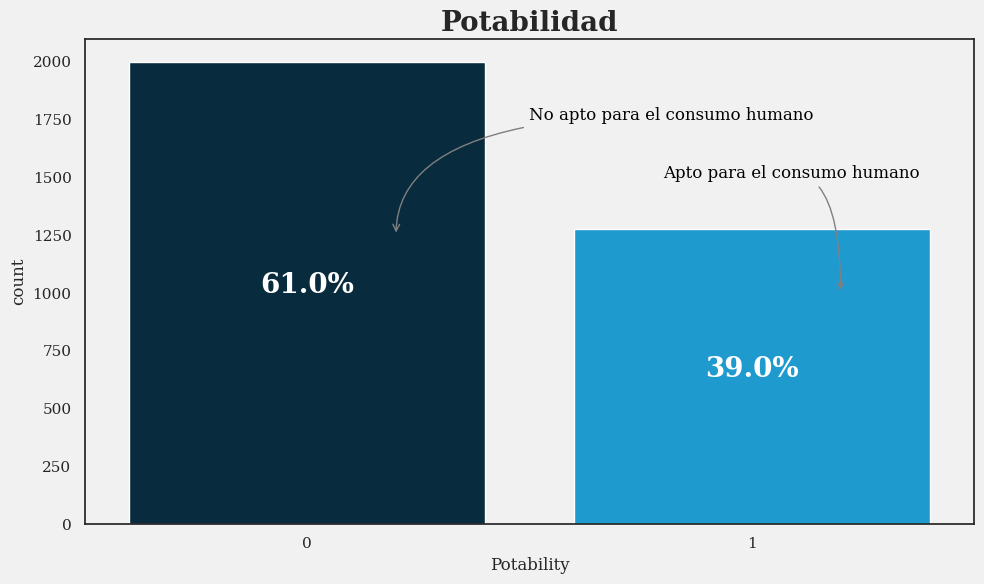

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear el gráfico de barras para la columna 'Potability'
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_water_Quality, x='Potability', palette=['#002D47', '#00A6ED'])

# Añadir el texto de porcentaje en cada barra
for i in ax.patches:
    ax.text(x=i.get_x() + i.get_width() / 2, 
            y=i.get_height() / 2,  # Ajustar la posición vertical del texto
            s=f"{np.round(i.get_height() / len(df_water_Quality) * 100, 0)}%", 
            ha='center', size=20, weight='bold', rotation=0, color='white')

# Título y personalización
plt.title("Potabilidad", size=20, weight='bold')

# Añadir anotaciones con flechas
plt.annotate(text="No apto para el consumo humano", 
             xytext=(0.5, 1750), xy=(0.2, 1250), 
             arrowprops=dict(arrowstyle="->", color='grey', connectionstyle="angle3,angleA=0,angleB=90"), 
             color='black')

plt.annotate(text="Apto para el consumo humano", 
             xytext=(0.8, 1500), xy=(1.2, 1000), 
             arrowprops=dict(arrowstyle="->", color='grey', connectionstyle="angle3,angleA=0,angleB=90"), 
             color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
